# **IRIS FLOWER CLASSIFICATION ML MODEL**

In [3]:
#importing modules
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
#loading dataset
iris = pd.read_csv("/content/iris.data", names =["sepal_length", "sepal_width", "petal_length", "petal_width", "Label"])
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Label         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris['Label'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Label, dtype: int64

In [8]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Label           0
dtype: int64

In [9]:
#correlation between the columns in the dataset
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


 **VISUALIZING THE DATA**

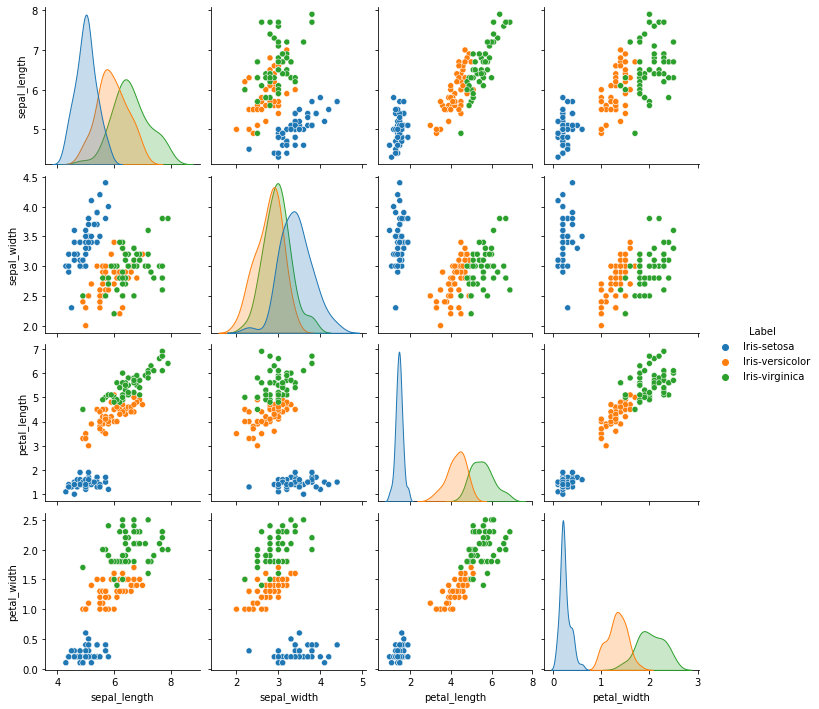

In [10]:
#PAIR PLOT
sb.pairplot(iris, hue="Label")
plt.show()

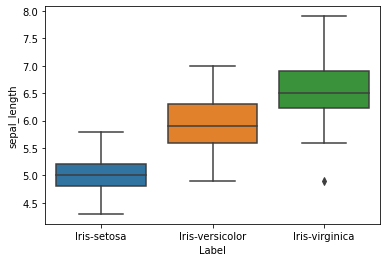

In [11]:
#BOXPLOT
sb.boxplot(x="Label",y="sepal_length",data=iris)

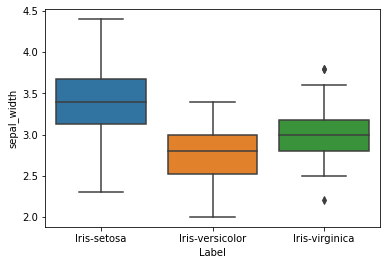

In [12]:
sb.boxplot(x="Label",y="sepal_width",data=iris)

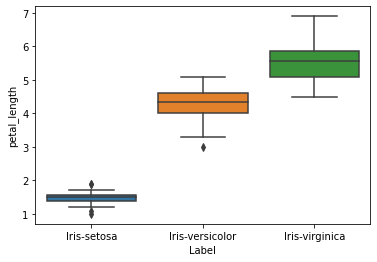

In [13]:
sb.boxplot(x="Label",y="petal_length",data=iris)

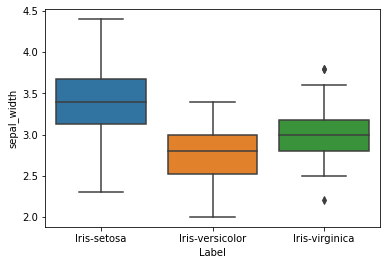

In [14]:
sb.boxplot(x="Label",y="sepal_width",data=iris)

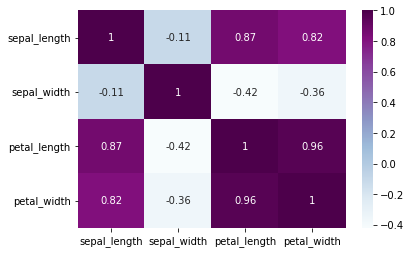

In [15]:
#HEATMAP
sb.heatmap(iris.corr(),cmap="BuPu", annot = True)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['Label']= le.fit_transform(iris['Label'])
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,Label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


**SPLITTING THE DATA**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x = iris.iloc[:,:-1]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y = iris.iloc[:,4]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Label, Length: 150, dtype: int64

In [20]:
#splitting the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=0)

In [21]:
x_train.shape

(105, 4)

In [22]:
y_train.shape

(105,)

In [23]:
x_test.shape

(45, 4)

In [24]:
y_test.shape

(45,)

**VARIOUS CLASSIFICATION MODELS**

**Logistic Regression**

In [25]:
#Importing Logistic Regression model and creation
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [26]:
#Model Training
model = lr.fit(x_train, y_train)

In [27]:
#PREDICTION
y_pred = model.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

Accuracy Score

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
print("Accuracy of Logistic regression model :" ,accuracy_score(y_test,y_pred)*100)

Accuracy of Logistic regression model : 97.77777777777777


**Decision Tree Classifier**

In [30]:
#Importing Decision Tree Classifier model and creation
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [31]:
#Model Training
model = dt.fit(x_train,y_train)

In [32]:
#PREDICTION
y_pred = model.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

Accuracy Score

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
print("Accuracy of Decision Tree Classifier model: ", accuracy_score(y_test, y_pred)*100)

Accuracy of Decision Tree Classifier model:  97.77777777777777


**KNN**

In [35]:
#Importing KNeighbors Classifier model and creation
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [36]:
#Model Training
model = kn.fit(x_train, y_train)

In [37]:
#PREDICTION
y_pred = model.predict(x_test)

In [38]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

Accuracy Score

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
print("Accuracy of Kneighbors classifier model : ", accuracy_score(y_test, y_pred)*100)

Accuracy of Kneighbors classifier model :  97.77777777777777
